In [5]:
import cPickle
from pixels import PixelReader
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
cut_id = 43

In [7]:
pr = PixelReader()

In [8]:
cut_data = cPickle.load(open("outputs/coincident_signals/%d.pickle" % cut_id, "r"))

In [9]:
cut_data.keys()

['hist', 'coincident_signals', 'peaks']

In [11]:
def cut_contains(cv, v):
    for c in cv:
        if c[0]<=v and c[1]>=v:
            return True
    return False

In [12]:
def find_peaks(hist):
    nsamps = len(hist)
    last = 0
    peaks = []
    for i in range(nsamps):
        if hist[i] > 0 and last == 0:
            peak_start = i    
        if hist[i] == 0 and last > 0:
            peak_end = i
            peak_amp = max(hist[peak_start:peak_end])
            peak_duration = peak_end - peak_start
            peaks.append([peak_start, peak_end, peak_duration, peak_amp])
        last = hist[i]
    return peaks

In [13]:
find_peaks(cut_data['hist'])

[[3469, 3476, 7, 3],
 [13687, 13689, 2, 1],
 [29463, 29466, 3, 1],
 [30811, 30812, 1, 1],
 [39306, 39312, 6, 5],
 [59862, 59866, 4, 1],
 [63216, 63219, 3, 1],
 [78331, 78333, 2, 1],
 [87818, 87825, 7, 4],
 [96105, 96109, 4, 1],
 [105283, 105289, 6, 6],
 [125188, 125190, 2, 1],
 [172470, 172473, 3, 2],
 [185408, 185411, 3, 1],
 [199845, 199847, 2, 1],
 [200149, 200288, 139, 30],
 [226885, 226890, 5, 1],
 [243604, 243606, 2, 1],
 [245949, 245955, 6, 7],
 [248045, 248051, 6, 4],
 [255784, 255787, 3, 1]]

Say for example if we are interested in [200149, 200288, 139, 30]. Do not care about the computational complexity

In [14]:
cs = cut_data['coincident_signals']
v = 200149
pixels = [int(p) for p in cs if cut_contains(cs[p], v)]

In [15]:
pixels

[73]

In [16]:
def pixels_affected(cs, v):
    return [int(p) for p in cs if cut_contains(cs[p], v)]

In [17]:
pixels_affected(cs, 200277)

[334, 271, 399, 9, 73]

In [18]:
def affected_pos(cs, v):
    pixels = pixels_affected(cs, v)
    pos = np.array([pr.getXY(p) for p in pixels])
    return np.mean(pos, 0)

In [20]:
affected_pos(cs, 200277)

array([ 4.032, -2.044])

In [48]:
def get_track(cs, time_range):
    start_v = time_range[0]
    end_v = time_range[1]
    return np.vstack([affected_pos(cs, v) for v in range(start_v, end_v)])

In [49]:
pos = get_track(cs, [200149, 200288])

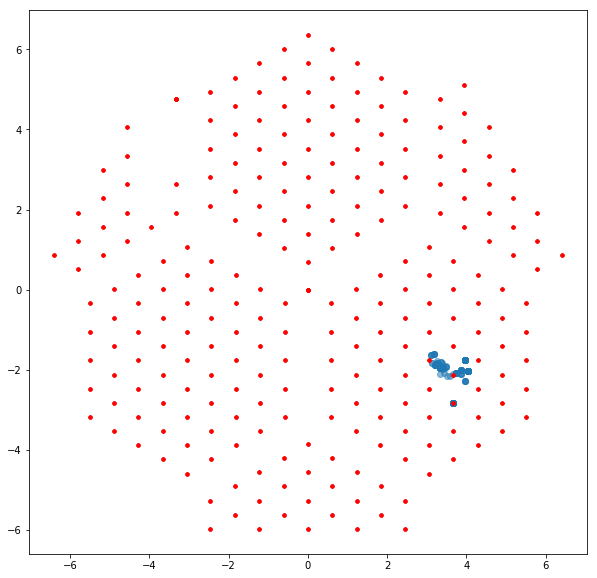

In [50]:
plt.figure(figsize=(10,10))
pr.plot()
plt.scatter(pos[:,0],pos[:,1], alpha=0.5)
# plt.plot(pos[:,0],pos[:,1])

In [ ]:
# next we will plot the track for all coincident signals in this cut data

In [46]:
signals = [p[0:2] for p in find_peaks(cut_data['hist'])]

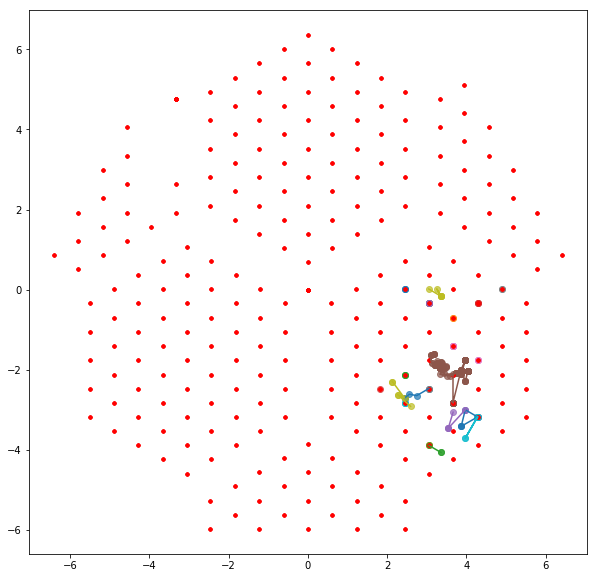

In [53]:
plt.figure(figsize=(10,10))
pr.plot()
for s in signals:
    pos = get_track(cs, s)
    plt.scatter(pos[:,0], pos[:,1], alpha=0.7)
    plt.plot(pos[:,0],pos[:,1])

Work with a general cut

[[6677, 6684], [16175, 16180], [29565, 29568], [39557, 39558], [45276, 45282], [46097, 46102], [47383, 47385], [49883, 49886], [52890, 52897], [57665, 57672], [61766, 61769], [88644, 88652], [99808, 99813], [120321, 120327], [131546, 131550], [133316, 133320], [136101, 136109], [138468, 138472], [151692, 151697], [156162, 156163], [165538, 165544], [167422, 167428], [169387, 169392], [179949, 179955], [198457, 198460], [202315, 202336], [207746, 207752], [236219, 236221], [242105, 242106]]


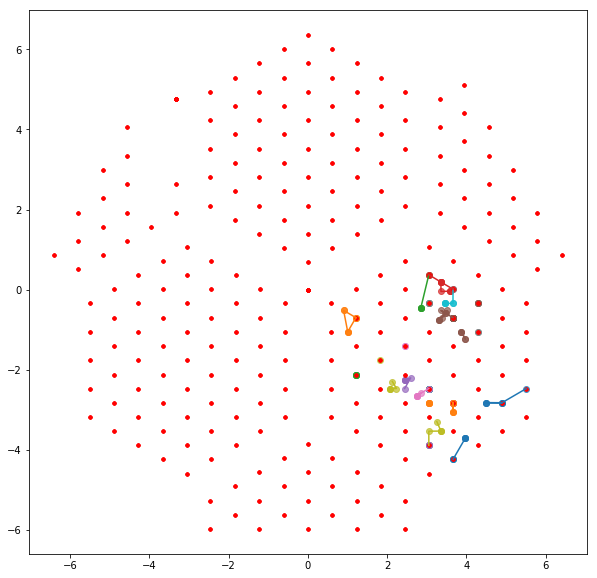

In [65]:
cut_id = 44
cut_data = cPickle.load(open("outputs/coincident_signals/%d.pickle" % cut_id, "r"))
cs = cut_data['coincident_signals']
signals = [p[0:2] for p in find_peaks(cut_data['hist'])]
plt.figure(figsize=(10,10))
pr.plot()
for s in signals:
    pos = get_track(cs, s)
    plt.scatter(pos[:,0], pos[:,1], alpha=0.7)
    plt.plot(pos[:,0],pos[:,1])